Files already downloaded and verified
torch.Size([64, 3, 32, 32])


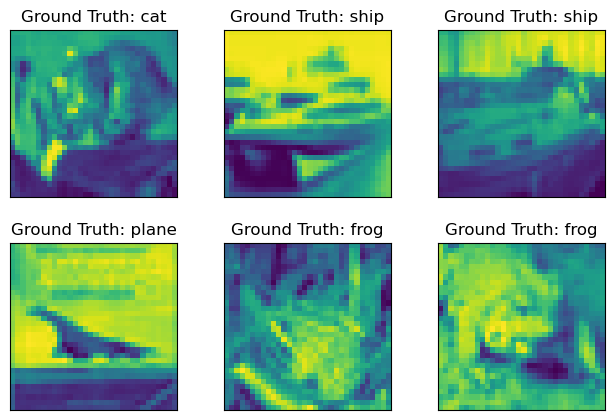


Test set: Average loss: 0.0362, Accuracy: 936/10000 (9%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.306452
Train Epoch: 1 [640/50000 (1%)]	Loss: 2.298411
Train Epoch: 1 [1280/50000 (3%)]	Loss: 2.271145
Train Epoch: 1 [1920/50000 (4%)]	Loss: 2.310475
Train Epoch: 1 [2560/50000 (5%)]	Loss: 2.270409
Train Epoch: 1 [3200/50000 (6%)]	Loss: 2.276374
Train Epoch: 1 [3840/50000 (8%)]	Loss: 2.230029
Train Epoch: 1 [4480/50000 (9%)]	Loss: 2.249175
Train Epoch: 1 [5120/50000 (10%)]	Loss: 2.238560
Train Epoch: 1 [5760/50000 (12%)]	Loss: 2.255754
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.236628
Train Epoch: 1 [7040/50000 (14%)]	Loss: 2.195835
Train Epoch: 1 [7680/50000 (15%)]	Loss: 2.221737
Train Epoch: 1 [8320/50000 (17%)]	Loss: 2.197289
Train Epoch: 1 [8960/50000 (18%)]	Loss: 2.145831
Train Epoch: 1 [9600/50000 (19%)]	Loss: 2.168243
Train Epoch: 1 [10240/50000 (20%)]	Loss: 2.148437
Train Epoch: 1 [10880/50000 (22%)]	Loss: 2.120472
Train Epoch: 1 [11520/50000 (23%)]	Loss: 2.103157
Train Epoch: 1 [121

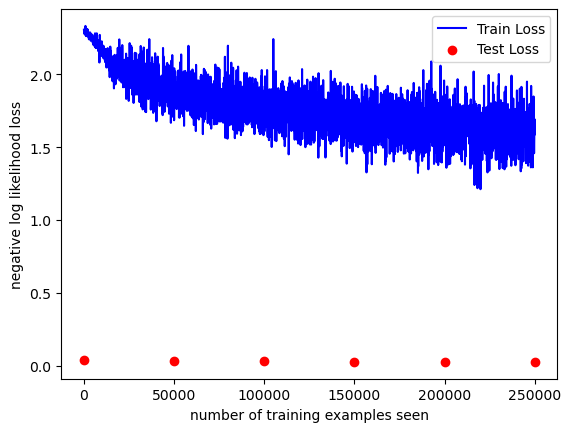

In [2]:
# Task 1
"""
This code trains a simple neural network on the CIFAR-10 dataset using PyTorch. The CIFAR-10 dataset consists of 60,000 images
in 10 different classes. The neural network includes three fully connected layers. The model is trained for a specified 
number of epochs, and its performance is evaluated using test data. The training and test losses are plotted at the end.
"""

from __future__ import print_function  # Ensures compatibility with Python 2 for print function.
import matplotlib.pyplot as plt  # Used for plotting data.
import numpy as np  # Used for numerical operations.
import torch  # Main PyTorch library.
import torch.nn as nn  # Provides neural network building blocks.
import torch.nn.functional as F  # Provides functions for activation and other layers.
import torch.optim as optim  # Provides optimization algorithms.
from torchvision import datasets, transforms, utils  # Handles datasets and image transformations.
from torch.autograd import Variable  # Enables gradient computation for tensors.

# Training settings
n_epochs = 5  # Number of training epochs.
batch_size = 64  # Number of samples per batch.
lr = 0.01  # Learning rate for the optimizer.
momentum = 0.5  # Momentum for the SGD optimizer.

# Load CIFAR-10 datasets for training and testing
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)  # Training data.
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())  # Test data.

# Create the input pipeline with DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)  # Training data loader.
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)  # Test data loader.

# Class labels for CIFAR-10 dataset
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get one batch of test data
examples = enumerate(test_loader)  # Enumerate through test data batches.
batch_idx, (example_data, example_targets) = next(examples)  # Get the first batch.

# Show the shape of one batch of test data
print(example_data.shape)  # Prints shape: (batch_size, 3, 32, 32) -> batch of RGB 32x32 images.

# Visualize some test images
fig1 = plt.figure()  # Create a figure for plotting.
for i in range(6):  # Loop over the first 6 images in the batch.
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots.
    plt.tight_layout()  # Adjust spacing between subplots.
    plt.imshow(example_data[i][0], interpolation='none')  # Show the first channel (grayscale equivalent).
    plt.title("Ground Truth: {}".format(classes[example_targets[i]]))  # Display the ground truth label.
    plt.xticks([])  # Remove x-axis ticks.
    plt.yticks([])  # Remove y-axis ticks.
plt.show()  # Display the plot.

# Class for building the neural network
class Net(nn.Module):  # Define a custom neural network class inheriting from nn.Module.
    def __init__(self):
        super(Net, self).__init__()  # Call the parent class initializer.
        self.l1 = nn.Linear(3072, 256)  # Fully connected layer from input (32x32x3=3072) to 256 nodes.
        self.l2 = nn.Linear(256, 64)  # Fully connected layer from 256 to 64 nodes.
        self.l3 = nn.Linear(64, 10)  # Fully connected layer from 64 to 10 output classes.

    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the input image into a single vector.
        x = F.relu(self.l1(x))  # Apply ReLU activation to the first layer.
        x = F.relu(self.l2(x))  # Apply ReLU activation to the second layer.
        return self.l3(x)  # Output raw scores (logits) for the 10 classes.

# Create the neural network model
model = Net()

# Set the loss function as cross-entropy loss
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss is suitable for classification tasks.
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)  # Use Stochastic Gradient Descent for optimization.

# Lists to store training and testing metrics
train_losses = []  # List to store training loss per batch.
train_counter = []  # List to store the number of training examples seen so far.
test_losses = []  # List to store test loss.
test_counter = [i * len(train_loader.dataset) for i in range(n_epochs + 1)]  # Track testing at the start and after each epoch.

# Training function
def train(epoch):
    model.train()  # Set the model to training mode.
    for batch_idx, (data, target) in enumerate(train_loader):  # Iterate over batches in the training data.
        data, target = Variable(data), Variable(target)  # Convert data and targets to Variables for gradient tracking.
        optimizer.zero_grad()  # Clear gradients from the previous batch.
        output = model(data)  # Forward pass: Compute predictions.
        loss = criterion(output, target)  # Compute the loss.
        loss.backward()  # Backpropagate the loss to compute gradients.
        optimizer.step()  # Update the model parameters using gradients.
        if batch_idx % 10 == 0:  # Print progress every 10 batches.
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 
                100. * batch_idx / len(train_loader), loss.item()))
        train_losses.append(loss.item())  # Append the loss for this batch.
        train_counter.append((batch_idx * 64) + ((epoch - 1) * len(train_loader.dataset)))  # Track progress.

# Testing function
def test():
    model.eval()  # Set the model to evaluation mode.
    test_loss = 0  # Initialize total test loss.
    correct = 0  # Initialize the count of correct predictions.
    for data, target in test_loader:  # Iterate over test data batches.
        with torch.no_grad():  # Disable gradient tracking.
            output = model(data)  # Forward pass: Compute predictions.
            test_loss += criterion(output, target).item()  # Accumulate batch loss.
            pred = output.data.max(1, keepdim=True)[1]  # Get the class with the highest score.
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()  # Count correct predictions.
    test_loss /= len(test_loader.dataset)  # Compute average loss per sample.
    test_losses.append(test_loss)  # Append test loss for this epoch.
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))  # Print test results.

# Run testing before training
test()
# Train the model for the specified number of epochs
for epoch in range(1, n_epochs + 1):
    train(epoch)  # Train the model for one epoch.
    test()  # Evaluate the model after each epoch.

# Plot the training and testing curves
fig2 = plt.figure()  # Create a new figure for plotting.
plt.plot(train_counter, train_losses, color='blue')  # Plot training loss in blue.
plt.scatter(test_counter, test_losses, color='red')  # Plot testing loss in red.
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')  # Add a legend.
plt.xlabel('number of training examples seen')  # Label the x-axis.
plt.ylabel('negative log likelihood loss')  # Label the y-axis.
plt.show()  # Display the plot.

Files already downloaded and verified
Files already downloaded and verified
torch.Size([1000, 3, 32, 32])


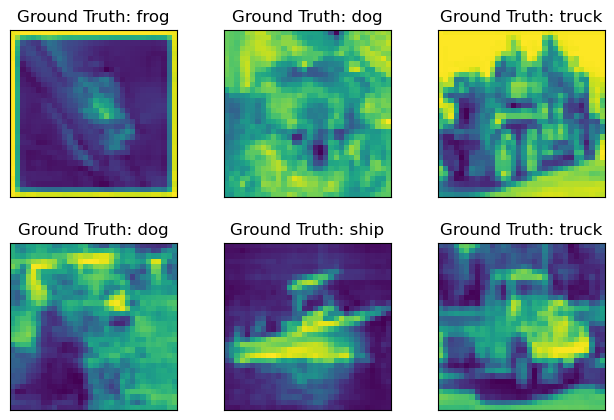


Test set: Avg. loss: 2.3077, Accuracy: 1078/10000 (11%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.325428
Train Epoch: 1 [64/50000 (0%)]	Loss: 2.305699
Train Epoch: 1 [128/50000 (0%)]	Loss: 2.312256
Train Epoch: 1 [192/50000 (0%)]	Loss: 2.301126
Train Epoch: 1 [256/50000 (1%)]	Loss: 2.315551
Train Epoch: 1 [320/50000 (1%)]	Loss: 2.328664
Train Epoch: 1 [384/50000 (1%)]	Loss: 2.320010
Train Epoch: 1 [448/50000 (1%)]	Loss: 2.292719
Train Epoch: 1 [512/50000 (1%)]	Loss: 2.306656
Train Epoch: 1 [576/50000 (1%)]	Loss: 2.299414
Train Epoch: 1 [640/50000 (1%)]	Loss: 2.276070
Train Epoch: 1 [704/50000 (1%)]	Loss: 2.297430
Train Epoch: 1 [768/50000 (2%)]	Loss: 2.307228
Train Epoch: 1 [832/50000 (2%)]	Loss: 2.301021
Train Epoch: 1 [896/50000 (2%)]	Loss: 2.306116
Train Epoch: 1 [960/50000 (2%)]	Loss: 2.299646
Train Epoch: 1 [1024/50000 (2%)]	Loss: 2.301677
Train Epoch: 1 [1088/50000 (2%)]	Loss: 2.292577
Train Epoch: 1 [1152/50000 (2%)]	Loss: 2.296075
Train Epoch: 1 [1216/50000 (2%)]	Loss: 2.314690
T

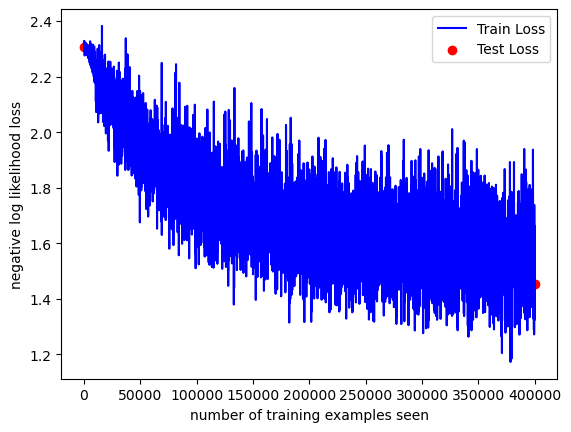

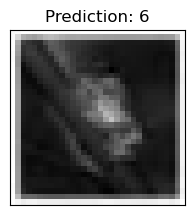

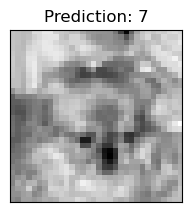

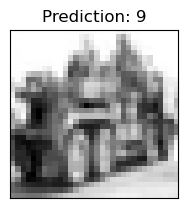

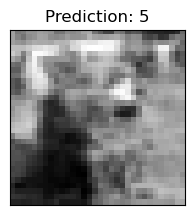

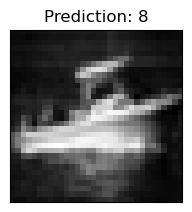

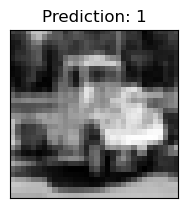

In [6]:
#Task 2
"""
This code trains a convolutional neural network (CNN) on the CIFAR-10 dataset using PyTorch. The CIFAR-10 dataset 
contains images classified into 10 different categories. The network includes convolutional layers, dropout, and 
fully connected layers. It is trained over multiple epochs, and the training and testing losses are plotted to 
evaluate the model's performance. Predictions are visualized for a batch of test data at the end.
"""

import torch  # Main PyTorch library.
import torchvision  # For working with datasets and image transformations.
import torch.nn as nn  # Provides neural network building blocks.
import torch.nn.functional as F  # Provides activation and utility functions.
import torch.optim as optim  # Provides optimization algorithms.
import matplotlib.pyplot as plt  # For visualizing data and plots.

# Training settings
n_epochs = 8  # Number of training epochs.
batch_size_train = 64  # Batch size for training.
batch_size_test = 1000  # Batch size for testing.
learning_rate = 0.01  # Learning rate for the optimizer.
momentum = 0.5  # Momentum for the optimizer.
log_interval = 1  # Interval for printing training progress.

# Set random seed for reproducibility
random_seed = 1  # Seed value for reproducibility.
torch.backends.cudnn.enabled = False  # Disable cuDNN for consistent results.
torch.manual_seed(random_seed)  # Set the random seed.

# Load CIFAR-10 training dataset and apply transformations
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root='./data', train=True, download=True,  # Download the training dataset.
                                 transform=torchvision.transforms.Compose([
                                     torchvision.transforms.ToTensor(),  # Convert images to tensors.
                                     torchvision.transforms.Normalize(  # Normalize images.
                                         (0.1307,), (0.3081,))
                                 ])),
    batch_size=batch_size_train, shuffle=True  # Load data in batches and shuffle.
)

# Load CIFAR-10 testing dataset and apply transformations
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root='./data', train=False, download=True,  # Download the testing dataset.
                                 transform=torchvision.transforms.Compose([
                                     torchvision.transforms.ToTensor(),  # Convert images to tensors.
                                     torchvision.transforms.Normalize(  # Normalize images.
                                         (0.1307,), (0.3081,))
                                 ])),
    batch_size=batch_size_test, shuffle=True  # Load data in batches.
)

# CIFAR-10 class labels
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get a batch of test data
examples = enumerate(test_loader)  # Enumerate through test data batches.
batch_idx, (example_data, example_targets) = next(examples)  # Get the first batch.

# Display the shape of the test data batch
print(example_data.shape)  # Shape is (batch_size_test, 3, 32, 32), representing RGB images.

# Visualize some test images
fig1 = plt.figure()  # Create a figure for plotting.
for i in range(6):  # Display the first 6 images.
    plt.subplot(2, 3, i + 1)  # Arrange the images in a 2x3 grid.
    plt.tight_layout()  # Adjust subplot spacing.
    plt.imshow(example_data[i][0], interpolation='none')  # Show the first channel of each image.
    plt.title("Ground Truth: {}".format(classes[example_targets[i]]))  # Display the ground truth label.
    plt.xticks([])  # Remove x-axis ticks.
    plt.yticks([])  # Remove y-axis ticks.
plt.show()  # Display the plot.

# Define the CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()  # Call the parent class initializer.
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)  # First convolutional layer (3 input channels, 10 output channels).
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)  # Second convolutional layer (10 input channels, 20 output channels).
        self.conv2_drop = nn.Dropout2d()  # Dropout layer for regularization.
        self.fc1 = nn.Linear(500, 250)  # Fully connected layer (500 input features, 250 output features).
        self.fc2 = nn.Linear(250, 10)  # Fully connected layer (250 input features, 10 output features).

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # Apply ReLU activation and max pooling to the first convolutional layer.
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))  # Apply dropout, ReLU, and max pooling to the second layer.
        x = torch.flatten(x, 1)  # Flatten the tensor for the fully connected layer.
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first fully connected layer.
        x = F.dropout(x, training=self.training)  # Apply dropout during training.
        x = self.fc2(x)  # Output the logits for 10 classes.
        return F.log_softmax(x, dim=1)  # Apply log softmax for probabilities.

# Initialize the network and optimizer
network = Net()  # Create an instance of the network.
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)  # Use SGD optimizer.

# Lists for storing training and testing metrics
train_losses = []  # Training loss per batch.
train_counter = []  # Number of training examples seen so far.
test_losses = []  # Test loss per epoch.
test_counter = [i * len(train_loader.dataset) for i in range(n_epochs + 1)]  # Track testing at each epoch.

# Training function
def train(epoch):
    network.train()  # Set the network to training mode.
    for batch_idx, (data, target) in enumerate(train_loader):  # Iterate over training batches.
        optimizer.zero_grad()  # Clear gradients from the previous batch.
        output = network(data)  # Forward pass: Compute predictions.
        loss = F.nll_loss(output, target)  # Compute negative log-likelihood loss.
        loss.backward()  # Backpropagate the loss to compute gradients.
        optimizer.step()  # Update the model parameters using gradients.
        if batch_idx % log_interval == 0:  # Print progress every `log_interval` batches.
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())  # Append the loss for this batch.
            train_counter.append((batch_idx * 64) + ((epoch - 1) * len(train_loader.dataset)))  # Track progress.

# Testing function
def test():
    network.eval()  # Set the network to evaluation mode.
    test_loss = 0  # Initialize total test loss.
    correct = 0  # Initialize correct predictions count.
    with torch.no_grad():  # Disable gradient computation.
        for data, target in test_loader:  # Iterate over test batches.
            output = network(data)  # Forward pass: Compute predictions.
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # Accumulate test loss.
            pred = output.data.max(1, keepdim=True)[1]  # Get the predicted class.
            correct += pred.eq(target.data.view_as(pred)).sum()  # Count correct predictions.
        test_loss /= len(test_loader.dataset)  # Compute average test loss.
        test_losses.append(test_loss)  # Append test loss for this epoch.
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))  # Print test results.

# Run testing before training
test()
# Train and test the model for the specified number of epochs
for epoch in range(1, n_epochs + 1):
    train(epoch)  # Train for one epoch.
    test()  # Test after each epoch.

# Plot the training and testing losses
fig2 = plt.figure()  # Create a new figure.
plt.plot(train_counter, train_losses, color='blue')  # Plot training loss.
plt.scatter(test_counter, test_losses, color='red')  # Plot testing loss.
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')  # Add a legend.
plt.xlabel('number of training examples seen')  # Label the x-axis.
plt.ylabel('negative log likelihood loss')  # Label the y-axis.
plt.show()  # Display the plot.

# Visualize predictions for a batch of test data
with torch.no_grad():  # Disable gradient computation.
    output = network(example_data)  # Compute predictions for the example batch.
    fig3 = plt.figure()  # Create a new figure for visualization.
    for i in range(6):  # Display the first 6 test images.
        plt.subplot(2, 3, i + 1)  # Arrange images in a 2x3 grid.
        plt.tight_layout()  # Adjust subplot spacing.
        plt.imshow(example_data[i][0], cmap='gray', interpolation='none')  # Show the image.
        plt.title("Prediction: {}".format(
            output.data.max(1, keepdim=True)[1][i].item()))  # Display the predicted class.
        plt.xticks([])  # Remove x-axis ticks.
        plt.yticks([])  # Remove y-axis ticks.
        plt.show()  # Display the plot.